In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/bank_loan_train.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/bank_loan_test.csv")

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [47]:
train.dtypes

Loan_ID                    int64
Loan_Amount_Requested     object
Length_Employed           object
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
dtype: object

In [4]:
train.shape

(164309, 14)

In [5]:
test.shape

(109541, 13)

In [7]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [8]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [9]:
train_missing = train.isnull().sum()/len(train)*100
train_missing

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.486060
Home_Owner                 15.427639
Annual_Income              15.277313
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.788289
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
Interest_Rate               0.000000
dtype: float64

In [10]:
test_missing = test.isnull().sum()/len(test)*100
test_missing

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.506075
Home_Owner                 15.255475
Annual_Income              15.426187
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.732392
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
dtype: float64

In [12]:
# Drop Months_Since_Deliquency since it contains more than 50% missing values

train = train.drop('Months_Since_Deliquency',axis = 1)
test = test.drop('Months_Since_Deliquency',axis = 1)

In [13]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,76.000000,156.000000,3.000000


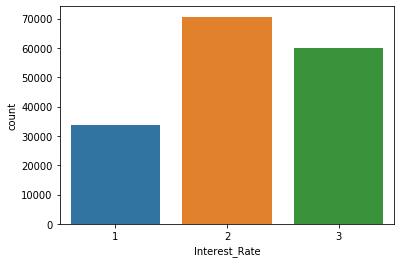

In [23]:
sns.countplot(x = 'Interest_Rate',data = train)

In [37]:
# Most borrowers are assigned interest rate category 2

<Figure size 1152x576 with 0 Axes>

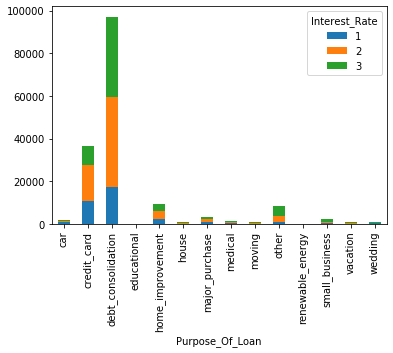

In [20]:
# Purpose of loan by interest rate category
plt.figure(figsize = (16,8))
purpose_plot = pd.crosstab(train['Purpose_Of_Loan'], train['Interest_Rate'])
purpose_plot.plot(kind='bar', stacked=True)

In [24]:
# the purpose for many borrowers was repaying for anoth loans(debt consolidation) 
# most of those are assigned loan rate category 2

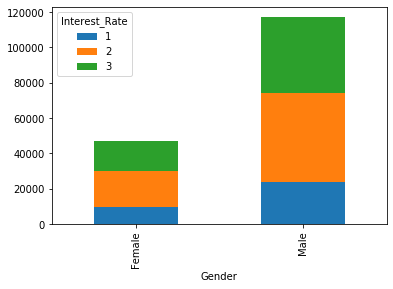

In [25]:
# inerest rate category by Gender

gender_plot = pd.crosstab(train['Gender'],train['Interest_Rate'])
gender_plot.plot(kind = 'bar',stacked =  True)

In [26]:
# most of the borrowers are males in category 2

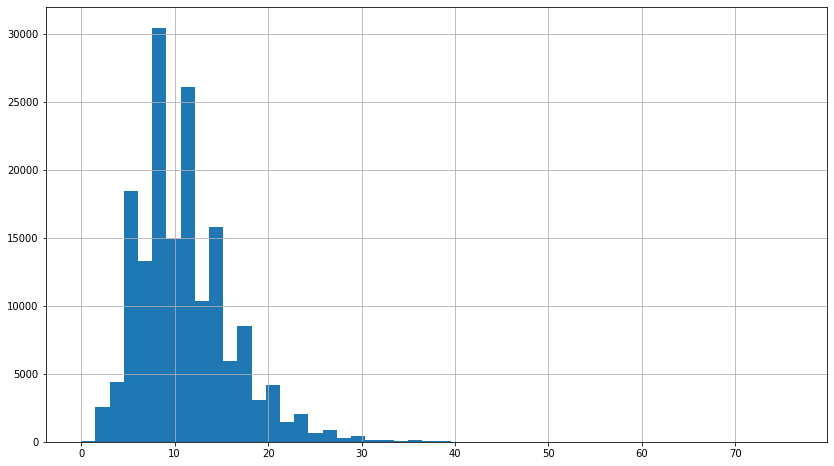

In [57]:
plt.figure(figsize = (14,8))
train['Number_Open_Accounts'].hist(bins=50)

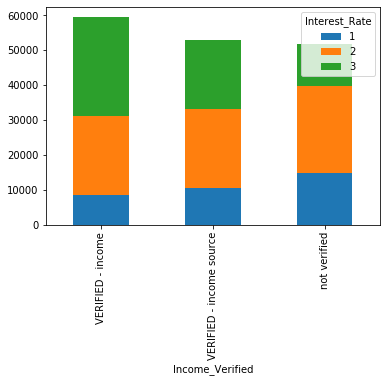

In [33]:
# Income verified by interest rate category
income_plot = pd.crosstab(train['Income_Verified'],train['Interest_Rate'])
income_plot.plot(kind = 'bar',stacked =  True)

In [34]:
# borrowers with Non verified income most of them are assigned to interest rate category 2

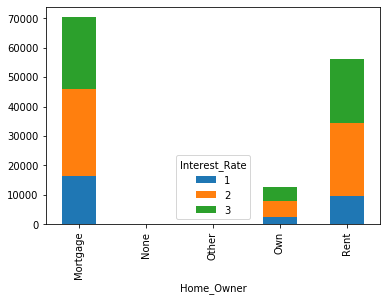

In [35]:
# Home owner by interest rate category
home_plot = pd.crosstab(train['Home_Owner'],train['Interest_Rate'])
home_plot.plot(kind = 'bar',stacked =  True)

In [36]:
# most borrowers with mortgages are assigned to interest rate category 2

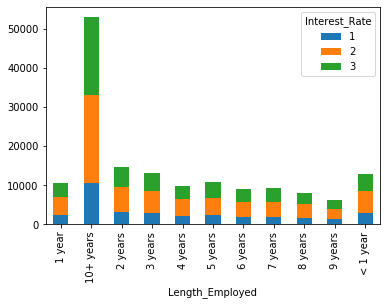

In [38]:
# most borrowers with more than 10 years employed are in interest rate category 2
employed_plot = pd.crosstab(train['Length_Employed'],train['Interest_Rate'])
employed_plot.plot(kind = 'bar',stacked =  True)

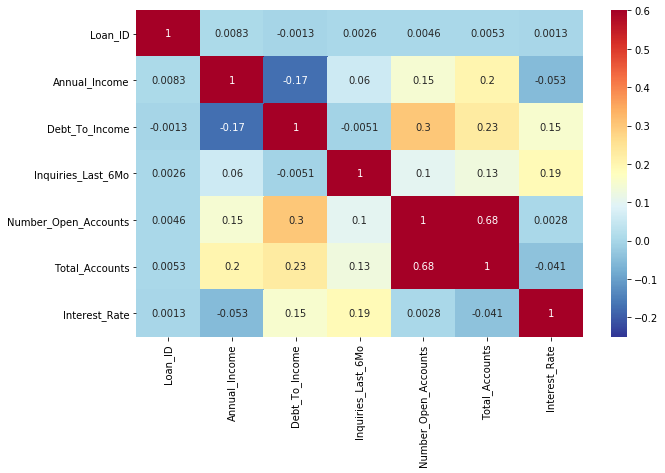

In [54]:
plt.figure(figsize =(10,6))
sns.heatmap(train.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

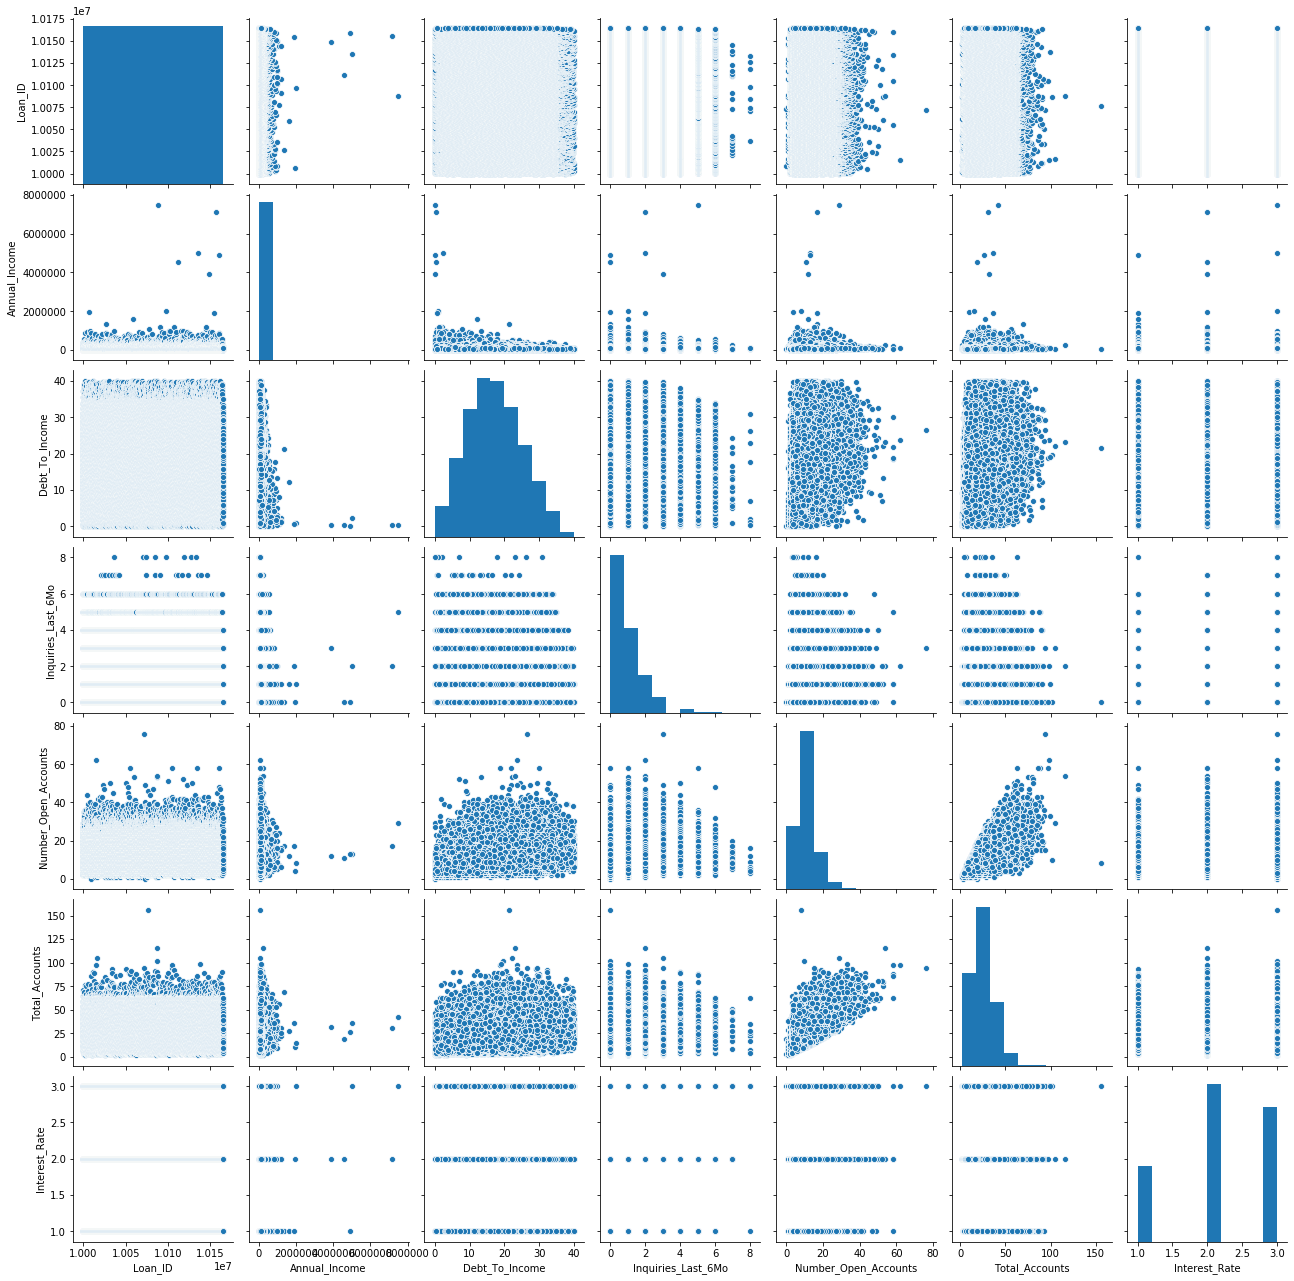

In [55]:
sns.pairplot(train)

In [52]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [59]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,Male


In [58]:
train = train.drop('Loan_Amount_Requested',axis = 1)
train = train.drop('Loan_ID',axis = 1)
train = train.drop('Number_Open_Accounts',axis = 1)
train = train.drop('Total_Accounts',axis = 1)
train = train.drop('Inquiries_Last_6Mo',axis = 1)

In [60]:
test = test.drop('Loan_Amount_Requested',axis = 1)
test = test.drop('Number_Open_Accounts',axis = 1)
test = test.drop('Total_Accounts',axis = 1)
test = test.drop('Inquiries_Last_6Mo',axis = 1)

In [61]:
train.shape

(164309, 8)

In [62]:
test.shape

(109541, 8)

In [63]:
test_missing = test.isnull().sum()/len(test)*100
test_missing

Loan_ID             0.000000
Length_Employed     4.506075
Home_Owner         15.255475
Annual_Income      15.426187
Income_Verified     0.000000
Purpose_Of_Loan     0.000000
Debt_To_Income      0.000000
Gender              0.000000
dtype: float64

In [64]:
train_missing = train.isnull().sum()/len(train)*100
train_missing

Length_Employed     4.486060
Home_Owner         15.427639
Annual_Income      15.277313
Income_Verified     0.000000
Purpose_Of_Loan     0.000000
Debt_To_Income      0.000000
Gender              0.000000
Interest_Rate       0.000000
dtype: float64

In [69]:
train['Annual_Income'].fillna(train['Annual_Income'].mean(),inplace = True)
train['Length_Employed'].fillna('10+ years',inplace = True)
train['Home_Owner'].fillna('Home_Owner',inplace = True)

In [70]:
test['Annual_Income'].fillna(test['Annual_Income'].mean(),inplace = True)
test['Length_Employed'].fillna('10+ years',inplace = True)
test['Home_Owner'].fillna('Home_Owner',inplace = True)

In [73]:
train.head()

,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Gender,Interest_Rate
0,< 1 year,Rent,68000.000000,not verified,car,18.37,Female,1
1,4 years,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,Female,3
2,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,Male,3
3,< 1 year,Home_Owner,56160.000000,VERIFIED - income source,debt_consolidation,14.34,Male,3
4,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,Female,1


In [74]:
le = LabelEncoder()
train['Length_Employed']=le.fit_transform(train['Length_Employed'])
train['Home_Owner']=le.fit_transform(train['Home_Owner'])
train['Income_Verified']=le.fit_transform(train['Income_Verified'])
train['Purpose_Of_Loan']=le.fit_transform(train['Purpose_Of_Loan'])
train['Gender']=le.fit_transform(train['Gender'])

In [75]:
test['Length_Employed']=le.fit_transform(test['Length_Employed'])
test['Home_Owner']=le.fit_transform(test['Home_Owner'])
test['Income_Verified']=le.fit_transform(test['Income_Verified'])
test['Purpose_Of_Loan']=le.fit_transform(test['Purpose_Of_Loan'])
test['Gender']=le.fit_transform(test['Gender'])

In [78]:
from sklearn import preprocessing


#Classification Algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,precision_score, recall_score, classification_report, confusion_matrix

In [79]:
X = train.drop('Interest_Rate',axis=1)
y = train['Interest_Rate']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [96]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [97]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

43.07913902582517

In [98]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

47.80597650782059

In [99]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

48.666139208406875

In [100]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100

39.433590976406386

In [103]:
# Neural Network

nnt = MLPClassifier()
nnt.fit(X_train,y_train)
nnt.score(X_test,y_test)*100

48.35980768060374

In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [91]:
import xgboost 
from xgboost import XGBClassifier

In [104]:
# XG Boost (it deals with imbalance classes directly)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)*100

47.854664962570745

In [112]:
y_pred = gb.predict(X_test)

In [116]:
f1_score(y_test, y_pred, average="macro")

0.4091005856512721

In [119]:
precision_score(y_test, y_pred, average="macro")

0.4850213095157523

In [120]:
accuracy_score(y_test,y_pred)

0.4866613920840687

In [122]:
Loan_ID = pd.DataFrame(test.Loan_ID)

In [123]:
test = test.drop('Loan_ID',axis = 1)

In [124]:
y_final = gb.predict(test)

#Submission
submission = pd.DataFrame({
        "Loan_ID": Loan_ID["Loan_ID"],
        "Interest_Rate": y_final
    })
submission.head()
submission.to_csv('Interest_Rate.csv', index=False)